# Grupo Bimbo Inventory Demand
[Link](https://www.kaggle.com/c/grupo-bimbo-inventory-demand)

## Describing "producto_tabla"

In [11]:
# Load producto_tabla data
from pyspark.sql.types import StringType
from pyspark.sql.functions import col

path = '/home/jasam/Downloads/bimbo/producto_tabla.csv'
product_table_rdd = (sc.textFile(path)
                     .map(lambda line: line.split(",")))

product_table_df = (product_table_rdd
                    .toDF(['producto_id','nombre_producto']))
#drop Header
product_table_df = (product_table_df
                    .filter(col('producto_id') != 'Producto_ID'))

product_table_df.show(20, False)

+-----------+----------------------------------------+
|producto_id|nombre_producto                         |
+-----------+----------------------------------------+
|0          |NO IDENTIFICADO 0                       |
|9          |Capuccino Moka 750g NES 9               |
|41         |Bimbollos Ext sAjonjoli 6p 480g BIM 41  |
|53         |Burritos Sincro 170g CU LON 53          |
|72         |Div Tira Mini Doradita 4p 45g TR 72     |
|73         |Pan Multigrano Linaza 540g BIM 73       |
|98         |Tostado Integral 180g WON 98            |
|99         |Pan Blanco 567g WON 99                  |
|100        |Super Pan Bco Ajonjoli 680g SP WON 100  |
|106        |Wonder 100pct mediano 475g WON 106      |
|107        |Wonder 100pct gde 680g SP WON 107       |
|108        |Baguette Precocida Cong 280g DH 108     |
|109        |Pan Multicereal 475g WON 109            |
|112        |Tostado Integral 180g WON 112           |
|122        |Biscotel Receta Original 410g CU SUA 122|
|123      

## Nulls in product_tabla

In [145]:
def count_null(col_name):
    return sum(col(col_name).isNull().cast('integer')).alias(col_name)

In [146]:
exprs = []
for col_name in product_table_df.columns:
    exprs.append(count_null(col_name))
# Run the aggregation. The *exprs converts the list of expressions into
# variable function arguments.
product_table_df.agg(*exprs).show()

+----------+------------+
|product_id|product_name|
+----------+------------+
|         0|           0|
+----------+------------+



## Count rows - producto_tabla

In [147]:
format(product_table_df.count(), ',d')

'2,592'

## Describing "cliente_tabla"

In [2]:
# Load producto_tabla data
from pyspark.sql.types import StringType
from pyspark.sql.functions import col

path = '/home/jasam/Downloads/bimbo/cliente_tabla.csv'
customer_table_rdd = (sc.textFile(path)
                      .map(lambda line: line.split(",")))

customer_table_df = (customer_table_rdd
                     .toDF(['customer_id','customer_name']))
#drop Header
customer_table_df = (customer_table_df
                     .filter(col('customer_id') != 'Cliente_ID'))

customer_table_df.show(20, False)

+-----------+---------------------------------------+
|customer_id|customer_name                          |
+-----------+---------------------------------------+
|0          |SIN NOMBRE                             |
|1          |OXXO XINANTECATL                       |
|2          |SIN NOMBRE                             |
|3          |EL MORENO                              |
|4          |SDN SER  DE ALIM  CUERPO SA CIA  DE INT|
|4          |SDN SER DE ALIM CUERPO SA CIA DE INT   |
|5          |LA VAQUITA                             |
|6          |LUPITA                                 |
|7          |I M EL GUERO                           |
|8          |MINI SUPER LOS LUPES                   |
|9          |SUPER KOMPRAS MICRO COLON              |
|10         |LONJA MERCANTIL DE TODO                |
|11         |FARMACIA NICOLAS SAN JUAN              |
|12         |PAPELERIA CATALA                       |
|13         |ELENA                                  |
|14         |CASA TRINO     

## Nulls in customer_table_df

In [149]:
exprs = []
for col_name in customer_table_df.columns:
    exprs.append(count_null(col_name))
# Run the aggregation. The *exprs converts the list of expressions into
# variable function arguments.
customer_table_df.agg(*exprs).show()

+-----------+-------------+
|customer_id|customer_name|
+-----------+-------------+
|          0|            0|
+-----------+-------------+



## Count rows - cliente_tabla

In [150]:
format(customer_table_df.count(), ',d')

'935,362'

## Describing "town_state"

In [151]:
# Load producto_tabla data
from pyspark.sql.types import StringType
from pyspark.sql.functions import col

path = '/home/jasam/Downloads/bimbo/town_state.csv'

# Clean data
town_state_table_rdd = (sc.textFile(path)
                        .map(lambda line: line.replace('MÉXICO,','MÉXICO')))

town_state_table_rdd = (town_state_table_rdd
                        .map(lambda line: line.split(",")))
town_state_table_df = (town_state_table_rdd
                       .toDF(['agency_id','town','state']))
#drop Header
town_state_table_df = (town_state_table_df
                       .filter(col('agency_id') != 'Agencia_ID'))

town_state_table_df.show(20, False)

+---------+-----------------------+----------------+
|agency_id|town                   |state           |
+---------+-----------------------+----------------+
|1110     |2008 AG. LAGO FILT     |"MÉXICO D.F."   |
|1111     |2002 AG. AZCAPOTZALCO  |"MÉXICO D.F."   |
|1112     |2004 AG. CUAUTITLAN    |ESTADO DE MÉXICO|
|1113     |2008 AG. LAGO FILT     |"MÉXICO D.F."   |
|1114     |2029 AG.IZTAPALAPA 2   |"MÉXICO D.F."   |
|1116     |2011 AG. SAN ANTONIO   |"MÉXICO D.F."   |
|1117     |2001 AG. ATIZAPAN      |ESTADO DE MÉXICO|
|1118     |2007 AG. LA VILLA      |"MÉXICO D.F."   |
|1119     |2013 AG. MEGA NAUCALPAN|ESTADO DE MÉXICO|
|1120     |2018 AG. TEPALCATES 2  |"MÉXICO D.F."   |
|1121     |2016 AG. SAN LORENZO   |"MÉXICO D.F."   |
|1122     |2019 AG. XALOSTOC      |ESTADO DE MÉXICO|
|1123     |2094 CHALCO_BM         |ESTADO DE MÉXICO|
|1124     |2021 AG. XOCHIMILCO 2  |"MÉXICO D.F."   |
|1126     |2017 AG. SANTA CLARA   |ESTADO DE MÉXICO|
|1127     |2003 AG. COACALCO      |ESTADO DE M

## Nulls in town_state_table_df

In [152]:
exprs = []
for col_name in town_state_table_df.columns:
    exprs.append(count_null(col_name))
# Run the aggregation. The *exprs converts the list of expressions into
# variable function arguments.
town_state_table_df.agg(*exprs).show()

+---------+----+-----+
|agency_id|town|state|
+---------+----+-----+
|        0|   0|    0|
+---------+----+-----+



## Count rows - town_state

In [153]:
format(town_state_table_df.count(), ',d')

'790'

## Group by state - count  - town_state table

In [154]:
(town_state_table_df.groupBy('state')
                    .count()
                    .orderBy(col('count').desc())
                    .show(20))

+--------------------+-----+
|               state|count|
+--------------------+-----+
|    ESTADO DE MÉXICO|   71|
|       "MÉXICO D.F."|   65|
|             JALISCO|   55|
|            VERACRUZ|   45|
|          GUANAJUATO|   39|
|              SONORA|   34|
|          NUEVO LEÓN|   34|
|              PUEBLA|   34|
|           MICHOACÁN|   33|
|          TAMAULIPAS|   32|
|BAJA CALIFORNIA N...|   32|
|            COAHUILA|   29|
|           CHIHUAHUA|   25|
|             SINALOA|   23|
|              OAXACA|   22|
|            GUERRERO|   21|
|             HIDALGO|   21|
| BAJA CALIFORNIA SUR|   17|
|             CHIAPAS|   16|
|     SAN LUIS POTOSÍ|   15|
+--------------------+-----+
only showing top 20 rows



## Describing "train data"

In [17]:
# Previously csv transformed into parquet files (improve perfomance 100x).
import time
start_time = time.time()
path = '/data/train_parquet/0_0_0.parquet'
train0_df = sqlContext.read.load(path)
path = '/data/train_parquet/0_0_1.parquet'
train1_df = sqlContext.read.load(path)
train_df = train0_df.unionAll(train1_df)
train_df = (train_df.filter(col('Semana') != 'Semana'))
print(format(train_df.count(), ',d'))
print("--- %s seconds ---" % (time.time() - start_time))

74,180,464
--- 8.440026998519897 seconds ---


In [3]:
# Load producto_tabla data
from pyspark.sql.types import StringType
from pyspark.sql.functions import col

path = '/data/train.csv'
train_table_rdd = (sc.textFile(path)
                   .map(lambda line: line.split(",")))
columns = ['week','agency_id','channel','route_sak','customer_id',
           'product_id','sale_uni_today','sale_today','dev_uni_prox',
           'dev_prox','demand_uni_equil']
train_table_df = (train_table_rdd
                  .toDF(columns))

#drop Header
train_table_df = (train_table_df
                  .filter(col('week') != 'Semana'))
#cast data
train_table_df = train_table_df.select(train_table_df.week,
                                       train_table_df.agency_id,
                                       train_table_df.channel,
                                       train_table_df.route_sak,
                                       train_table_df.customer_id,
                                       train_table_df.product_id,
                                       train_table_df.sale_uni_today.cast('float'),
                                       train_table_df.sale_today.cast('float'),
                                       train_table_df.dev_uni_prox.cast('float'),
                                       train_table_df.dev_prox.cast('float'),
                                       train_table_df.demand_uni_equil.cast('float'))
train_table_df.show(10, False)

+----+---------+-------+---------+-----------+----------+--------------+----------+------------+--------+----------------+
|week|agency_id|channel|route_sak|customer_id|product_id|sale_uni_today|sale_today|dev_uni_prox|dev_prox|demand_uni_equil|
+----+---------+-------+---------+-----------+----------+--------------+----------+------------+--------+----------------+
|3   |1110     |7      |3301     |15766      |1212      |3.0           |25.14     |0.0         |0.0     |3.0             |
|3   |1110     |7      |3301     |15766      |1216      |4.0           |33.52     |0.0         |0.0     |4.0             |
|3   |1110     |7      |3301     |15766      |1238      |4.0           |39.32     |0.0         |0.0     |4.0             |
|3   |1110     |7      |3301     |15766      |1240      |4.0           |33.52     |0.0         |0.0     |4.0             |
|3   |1110     |7      |3301     |15766      |1242      |3.0           |22.92     |0.0         |0.0     |3.0             |
|3   |1110     |

## Schema train data

In [156]:
train_table_df.printSchema()

root
 |-- week: string (nullable = true)
 |-- agency_id: string (nullable = true)
 |-- channel: string (nullable = true)
 |-- route_sak: string (nullable = true)
 |-- customer_id: string (nullable = true)
 |-- product_id: string (nullable = true)
 |-- sale_uni_today: float (nullable = true)
 |-- sale_today: float (nullable = true)
 |-- dev_uni_prox: float (nullable = true)
 |-- dev_prox: float (nullable = true)
 |-- demand_uni_equil: float (nullable = true)



## Nulls in train_table

In [157]:
exprs = []
for col_name in train_table_df.columns:
    exprs.append(count_null(col_name))
# Run the aggregation. The *exprs converts the list of expressions into
# variable function arguments.
train_table_df.agg(*exprs).show()

+----+---------+-------+---------+-----------+----------+--------------+----------+------------+--------+----------------+
|week|agency_id|channel|route_sak|customer_id|product_id|sale_uni_today|sale_today|dev_uni_prox|dev_prox|demand_uni_equil|
+----+---------+-------+---------+-----------+----------+--------------+----------+------------+--------+----------------+
|   0|        0|      0|        0|          0|         0|             0|         0|           0|       0|               0|
+----+---------+-------+---------+-----------+----------+--------------+----------+------------+--------+----------------+



## Count rows - train_table

In [4]:
start_time = time.time()
format(train_table_df.count(), ',d')
print("--- %s seconds ---" % (time.time() - start_time))

--- 200.9337179660797 seconds ---


## Descriptive Statistics - train_table

In [10]:
train_df.describe('venta_uni_hoy', 'venta_hoy', 'dev_uni_proxima', 'dev_proxima', 'demanda_uni_equil').show()

+-------+-----------------+-----------------+------------------+------------------+------------------+
|summary|    venta_uni_hoy|        venta_hoy|   dev_uni_proxima|       dev_proxima| demanda_uni_equil|
+-------+-----------------+-----------------+------------------+------------------+------------------+
|  count|         74180464|         74180464|          74180464|          74180464|          74180464|
|   mean|7.310163468376256|68.54452259084866|0.1302576646056029|1.2432480515376843|7.2245640038056385|
| stddev|21.96733684000345| 338.979515852164|29.323204167593044| 39.21552258149022| 21.77119294902963|
|    min|                0|              0.0|                 0|               0.0|                 0|
|    max|              999|           9999.2|                99|            999.92|               999|
+-------+-----------------+-----------------+------------------+------------------+------------------+



## Descriptive Statistics - "correlation" between unitary sales  and sales

In [160]:
train_table_df_cor = (train_table_df.select(train_table_df.sale_uni_today.cast('float'), 
                                            train_table_df.sale_today.cast('float')))
train_table_df_cor.stat.corr('sale_uni_today', 'sale_today')

0.7336777290062534

## Descriptive Statistics - "correlation" between dev_uni_prox  and dev_prox

In [161]:
train_table_df_cor = (train_table_df.select(train_table_df.dev_uni_prox.cast('float'), 
                                            train_table_df.dev_prox.cast('float')))
train_table_df_cor.stat.corr('dev_uni_prox', 'dev_prox')

0.1294211664137144

## Bar plot - count by product type

In [162]:
train_table_df.select('*')

DataFrame[week: string, agency_id: string, channel: string, route_sak: string, customer_id: string, product_id: string, sale_uni_today: float, sale_today: float, dev_uni_prox: float, dev_prox: float, demand_uni_equil: float]

In [12]:
product_grouped_df = (train_df.join(product_table_df, 'producto_id')
                                    .select(product_table_df.nombre_producto))
product_grouped_pandas = product_grouped_df.groupBy('nombre_producto').count().toPandas()
product_grouped_pandas = product_grouped_pandas.sort_values(by='count', ascending=0)

In [13]:
%matplotlib inline
import seaborn as sns

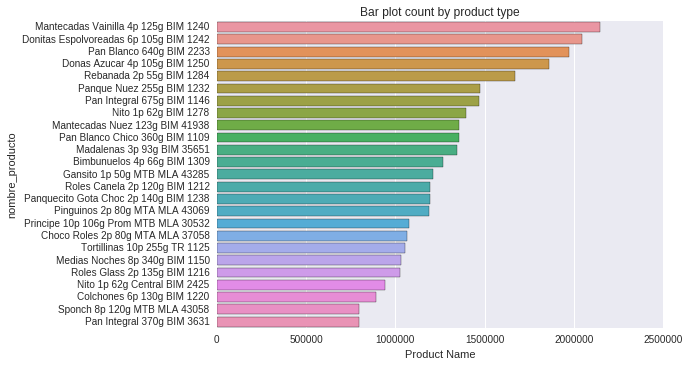

In [14]:
sns.plt.title('Bar plot count by product type')
plot = sns.barplot(x='count', y='nombre_producto', data=product_grouped_pandas.head(25))
plot.set(xlabel='Product Name')

## Bar plot sale unitary today

In [166]:
sale_uni_grouped_pandas = train_table_df.groupBy('sale_uni_today').count().toPandas()
sale_uni_grouped_pandas = sale_uni_grouped_pandas.sort_values(by='count', ascending=0)

In [167]:
sale_uni_grouped_pandas.head(10)

,sale_uni_today,count
2036,2.0,15299482
1935,1.0,13496679
1023,3.0,9271143
0,4.0,7260737
1605,5.0,5707842
1108,6.0,4272687
1685,10.0,2929543
77,8.0,2423855
577,7.0,1762233
1936,9.0,1191273


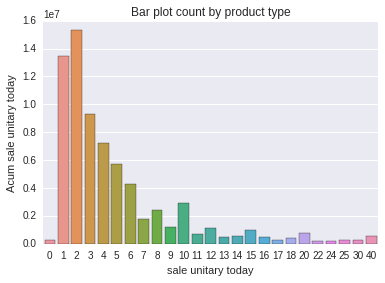

In [168]:
sale_uni_grouped_pandas[['sale_uni_today']] = sale_uni_grouped_pandas[['sale_uni_today']].astype(int)
sale_uni_grouped_pandas = sale_uni_grouped_pandas.sort_values(by='count', ascending=0)
sns.plt.title('Bar plot count by product type')
plot = sns.barplot(x='sale_uni_today', y='count', data=sale_uni_grouped_pandas.head(25))
plot.set(xlabel='sale unitary today')
plot.set(ylabel='Acum sale unitary today')

## Sale unity today for "Mantecadas Vainilla 4p 125g BIM 1240" distribution

In [169]:
product_grouped_pandas = (train_table_df.join(product_table_df, 'product_id')
                                        .select(product_table_df.product_name, train_table_df.sale_uni_today)
                                        .filter(product_table_df.product_name == 'Mantecadas Vainilla 4p 125g BIM 1240')
                                        .toPandas())

/home/jasam/anaconda3/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


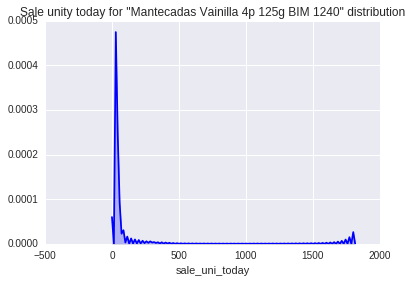

In [170]:
#product_grouped_pandas
product_grouped_pandas.loc[:,('sale_uni_today')] = product_grouped_pandas.sale_uni_today.astype(int)
sns.plt.title('Sale unity today for "Mantecadas Vainilla 4p 125g BIM 1240" distribution')
sns.distplot(product_grouped_pandas.sale_uni_today, hist=False, color="b", kde_kws={"shade": True})

## Clientes por registros

In [38]:
from pyspark.sql.functions import sum
customer_grouped_df = (train_table_df.join(customer_table_df, 'customer_id')
                                     .select(customer_table_df.customer_name, train_table_df.sale_uni_today)
                                     .groupBy('customer_name').agg(sum(train_table_df.sale_uni_today))
                                     )

customer_grouped_pandas = customer_grouped_df.toPandas()

In [44]:
customer_grouped_pandas = customer_grouped_pandas.sort_values(by='sum(sale_uni_today)', ascending=0)
customer_grouped_pandas.head(25)

,customer_name,sum(sale_uni_today)
42189,NO IDENTIFICADO,83656044.0
68501,PUEBLA REMISION,18650001.0
25545,LUPITA,2439982.0
141063,MARY,1430161.0
42176,LA PASADITA,1060571.0
182127,QUERETARO DE ARTEAGA REMISION,909671.0
186439,LA VENTANITA,813362.0
200132,LA GUADALUPANA,754723.0
148571,LA ESPERANZA,669800.0
254901,ALEX,665505.0


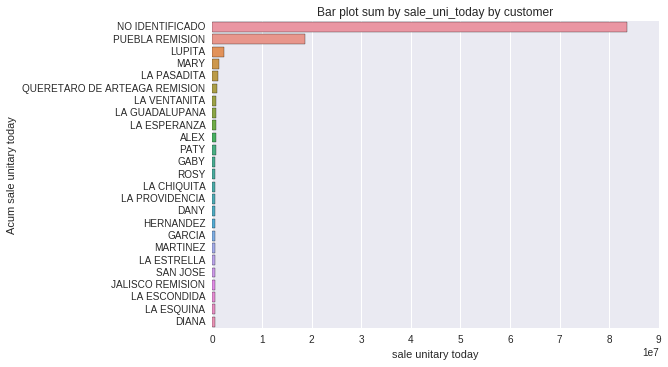

In [48]:
sns.plt.title('Bar plot sum by sale_uni_today by customer')
plot = sns.barplot(x='sum(sale_uni_today)', y='customer_name', data=customer_grouped_pandas.head(25))
plot.set(xlabel='sale unitary today')
plot.set(ylabel='Acum sale unitary today')